# Modèle de classement des textos en spam

Dans ce cas pratique on cherche à entraîner un modèle capable de prédire si un texto est un spam ou non. On s'appuie pour cela sur une base de données contenant des sms labellisés comme spam ou non spam (trouvée sur https://archive.ics.uci.edu/ml/datasets.php, voir readme pour plus d'informations).  

- Importez la base de données dans un dataframe 

In [1]:
import numpy as np
import pandas as pd
import re
import string

# Dataframe setup
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', None) # Permet d'afficher toutes les colonnes en indiquant None
pd.set_option('display.max_rows', None) # Permet d'afficher toutes les lignes en indiquant None

In [3]:
# Dataframe import
sms = pd.read_table('./smsspamcollection/SMSSpamCollection.txt', header= None)
sms.head()

,0,1
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


In [4]:
# On renomme les colonnes
sms.columns = ['target','text']
sms.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


- Appliquez les transformations usuelles du texte pour faciliter l'analyse textuelle

In [6]:
# To do only the first time in your machine
#import nltk.corpus
# nltk.download('stopwords')

In [8]:
# First we pass the dataframe to lowercase
# Then we remove the english stopwords
from nltk.corpus import stopwords
stop = stopwords.words('english')

def  clean_sms(df, text_field):
    df[text_field] = df[text_field].str.lower()
    df[text_field] = df[text_field].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
    #df[text_field] = df[text_field].apply(lambda elem: re.sub(f'[{string.punctuation}\n]', ' ', elem))
    
    return df

data_clean = clean_sms(sms, "text")
data_clean.head()

,target,text
0,ham,"go jurong point, crazy.. available bugis n great world la e buffet... cine got amore wat..."
1,ham,ok lar... joking wif u oni...
2,spam,free entry 2 wkly comp win fa cup final tkts 21st may 2005. text fa 87121 receive entry question(std txt rate)t&c's apply 08452810075over18's
3,ham,u dun say early hor... u c already say...
4,ham,"nah think goes usf, lives around though"


- Faites une matrice de termes et affichez les termes les plus fréquents dans chaque catégorie : spam ou non spam. Si nécessaire, enrichissez la liste de stop-words pour limiter la taille de la matrice.

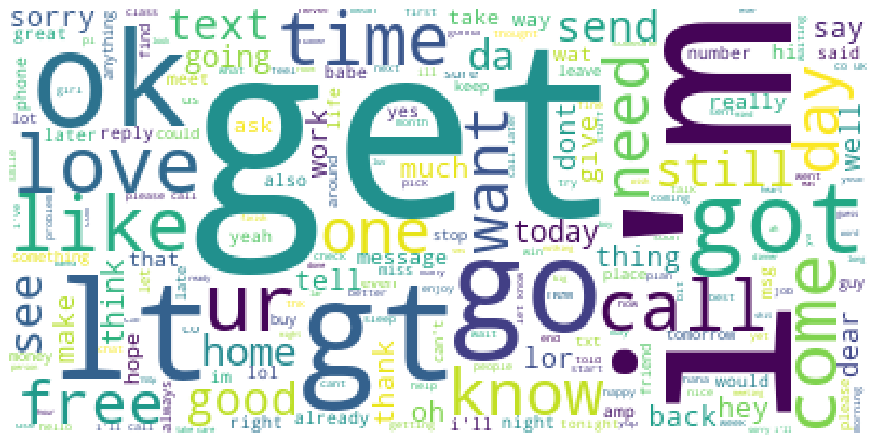

In [9]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image

wc = WordCloud(stopwords= stop, background_color= 'white').generate(str(data_clean.text))

plt.figure(figsize = (12, 6), facecolor = None) 
plt.imshow(wc)

plt.axis("off") 
plt.tight_layout(pad = 0)
plt.show()

In [10]:
# We count the number of times a word appears in the dataset
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()

# Fit_transform 
cr_cv = cv.fit_transform(data_clean.text)
cr_dtm = pd.DataFrame(cr_cv.toarray(), columns = cv.get_feature_names())
cr_dtm.index = data_clean.target
cr_dtm = cr_dtm.groupby("target").sum()
cr_dtm.head()

00  000  000pes  008704050406  0089  0121  01223585236  01223585334  \
target                                                                        
ham     0   0    1       0             0     0     0            0             
spam    10  29   0       2             1     1     1            2             

        0125698789  02  0207  02072069400  02073162414  02085076972  021  03  \
target                                                                         
ham     1           0   0     0            0            0            0    0    
spam    0           8   3     1            2            1            2    13   

        04  0430  05  050703  0578  06  07  07008009200  07046744435  \
target                                                                 
ham     0   0     0   0       0     0   0   0            0             
spam    12  1     5   2       2     8   2   1            1             

        07090201529  07090298926  07099833605  07123456789  0721072  \
target                                                                
ham     0            0            0            0            0         
spam    1            1            1            2            1         

        07732584351  07734396839  07742676969  07753741225  0776xxxxxxx  \
target                                                                    
ham     0            0            0            0            0             
spam    1            2            2            1            2             

        07781482378  07786200117  077xxx  078  07801543489  07808  \
target                                                              
ham     0            0            0       0    0            0       
spam    2            2            1       1    1            1       

        07808247860  07808726822  07815296484  07821230901  078498  \
target                                                               
ham     0            0            0            0            0        
spam    1            1            1            2            1        

        07880867867  0789xxxxxxx  07946746291  0796xxxxxx  07973788240  \
target                                                                   
ham     0            0            0            0           0             
spam    1            1            1            1           1             

        07xxxxxxxxx  08  0800  08000407165  08000776320  08000839402  \
target                                                                 
ham     0            0   0     0            0            0             
spam    3            2   13    2            2            15            

        08000930705  08000938767  08001950382  08002888812  08002986030  \
target                                                                    
ham     0            0            0            0            0             
spam    16           3            4            2            2             

        08002986906  08002988890  08006344447  0808  08081263000  08081560665  \
target                                                                          
ham     0            0            0            0     0            0             
spam    4            1            2            4     1            2             

        0825  083  0844  08448350055  08448714184  0845  08450542832  \
target                                                                 
ham     0     0    0     0            0            0     0             
spam    2     1    2     1            1            3     1             

        08452810071  08452810073  08452810075over18  0870  08700435505150p  \
target                                                                       
ham     0            0            0                  0     0                 
spam    1            3            2                  8     1                 

        08700469649  08700621170150p  08701213186  08701237397  08701417012  \
target                                      

In [11]:
# We display by most used words
dtm_analyse = cr_dtm.transpose()
dtm_analyse['Sum'] = dtm_analyse.ham + dtm_analyse.spam
dtm_analyse['ratio_ham'] = round((dtm_analyse.ham / sum(dtm_analyse.ham))*100, 4)
dtm_analyse['ratio_spam'] = round((dtm_analyse.spam / sum(dtm_analyse.spam))*100, 4)
dtm_analyse['ratio_sum'] = dtm_analyse.ratio_ham + dtm_analyse.ratio_spam

dtm_analyse.sort_values(by = max(['ratio_sum']), ascending = False).head(20)

target,ham,spam,Sum,ratio_ham,ratio_spam,ratio_sum
call,238,355,593,0.6005,2.7079,3.3084
free,60,224,284,0.1514,1.7086,1.8600
ur,247,144,391,0.6232,1.0984,1.7216
get,305,86,391,0.7696,0.6560,1.4256
txt,14,163,177,0.0353,1.2433,1.2786
now,146,106,252,0.3684,0.8085,1.1769
text,68,125,193,0.1716,0.9535,1.1251
stop,37,123,160,0.0934,0.9382,1.0316
mobile,15,127,142,0.0378,0.9687,1.0065
reply,44,104,148,0.1110,0.7933,0.9043


In [12]:
# With the precedent operation,
# We can make a better cleaning by removing words used less than a spcecific ratio
rare_words = []

for word in dtm_analyse.index :
    if dtm_analyse['ratio_sum'][word] <= 0.0027 :
        rare_words.append(word)


In [14]:
# We join the stop-words and rare-words
stop = stop + rare_words

In [21]:
# We can now make a new count
cv = CountVectorizer(stop_words= stop)

# Fit_transform 
cr_cv = cv.fit_transform(data_clean.text)
cr_dtm = pd.DataFrame(cr_cv.toarray(), columns = cv.get_feature_names())
cr_dtm.index = data_clean.target
cr_dtm = cr_dtm.groupby("target").sum()
cr_dtm.head()

____  a21  aah  aathi  ab  aberdeen  abi  ability  abiola  abj  able  \
target                                                                         
ham     2     0    3    6      0   0         4    2        11      2    26     
spam    0     1    0    0      1   1         0    0        0       0    0      

        abroad  absolutly  abt  abta  aburo  abuse  ac  academic  acc  accept  \
target                                                                          
ham     0       2          26   0     2      0      0   2         5    9        
spam    1       0          0    3     0      1      12  0         0    0        

        access  accessible  accident  accidentally  accommodation  \
target                                                              
ham     2       0           1         4             0               
spam    7       1           2         0             1               

        accommodationvouchers  accordingly  account  accounts  ache  \
target                                                                
ham     0                      2            21       2         4      
spam    1                      1            19       0         0      

        acl03530150pm  aco  across  acted  acting  action  activ8  activate  \
target                                                                        
ham     0              0    10      2      2       0       0       1          
spam    2              2    0       0      0       4       1       5          

        active  activities  actor  actual  actually  ad  adam  add  addamsfa  \
target                                                                         
ham     0       4           2      2       32        5   0     8    0          
spam    2       0           0      0       0         0   2     0    2          

        added  addicted  addie  address  admin  administrator  admirer  admit  \
target                                                                          
ham     4      4         3      18       2      2              0        2       
spam    2      0         0      4        0      0              10       0       

        adore  adoring  adp  adrian  ads  adult  advance  adventure  advice  \
target                                                                        
ham     3      2        0    0       0    1      7        2          5        
spam    0      0        1    1       2    4      0        0          0        

        advise  advisors  aeronautics  aeroplane  affair  affairs  affection  \
target                                                                         
ham     0       0         2            2          2       3        4           
spam    3       1         0            0          0       0        0           

        afraid  aft  afternoon  aftr  ag  agalla  age  age16  age23  agent  \
target                                                                       
ham     3       19   28         6     0   2       5    0      0      0       
spam    1       0    0          0     2   0       8    9      2      1       

        ages  ago  agree  ah  aha  ahead  ahmad  aight  aint  air  airport  \
target                                                                       
ham     4     13   2      36  8    7      6      33     5     6    4         
spam    1     0    0      0   0    0      0      0      0     0    1         

        airtel  aiya  aiyah  aiyar  aiyo  aka  akon  al  alaipayuthe  album  \
target                                                                        
ham     2       4     6      4      6     2    0     9   2            3       
spam    0       0     0      0      0     0    1     0   0            0       

        alcohol  alert  alertfrom  alerts  alex  alfie  algarve  ali  alive  \
target                                                                        
ham     3        0      0          0       8     0      0        2    3       
spam    0        4 

- Faites un nuage de mots par catégorie pour bien illustrer les différences des mots utilisés entre spam et non spam.

In [22]:
# We have to filter by spam and ham the dataset
data_cl_spam = data_clean[data_clean['target'] == 'spam']
data_cl_ham = data_clean[data_clean['target'] == 'ham']

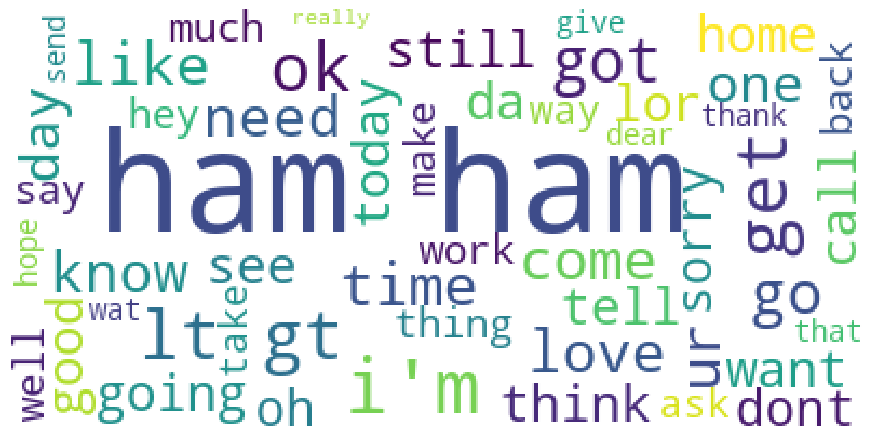

In [24]:
# HAM wordcloud
wc_ham = WordCloud(stopwords= stop, background_color= 'white', max_words= 50).generate(str(data_cl_ham))

plt.figure(figsize = (12, 6), facecolor = None) 
plt.imshow(wc_ham)

plt.axis("off") 
plt.tight_layout(pad = 0)
plt.show()

In [25]:
def  second_clean(df, text_field):
    df[text_field] = df[text_field].apply(lambda elem: re.sub(r'\b[0-9]{1,10}\w*', ' ', elem))
    
    return df

data_clean = second_clean(data_clean, "text")

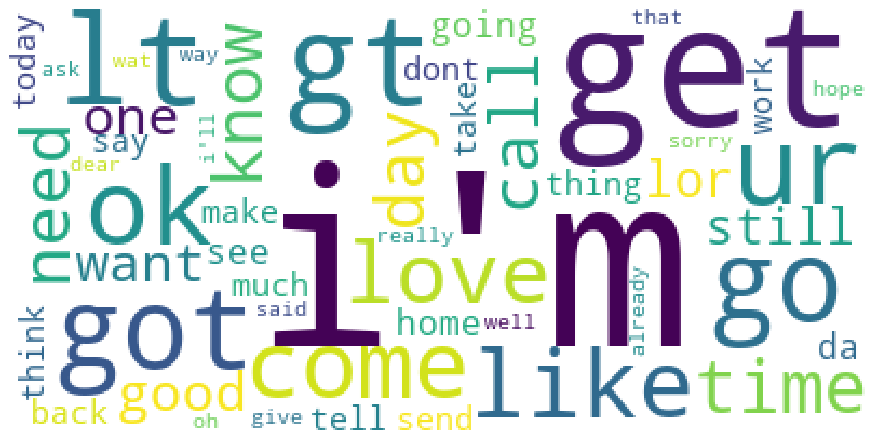

In [26]:
data_cl_ham = data_clean[data_clean['target'] == 'ham']
ham_txt = ''.join(data_cl_ham.text)

wc_ham = WordCloud(stopwords= stop, background_color= 'white', max_words= 50).generate(ham_txt)

plt.figure(figsize = (12, 6), facecolor = None) 
plt.imshow(wc_ham)

plt.axis("off") 
plt.tight_layout(pad = 0)
plt.show()

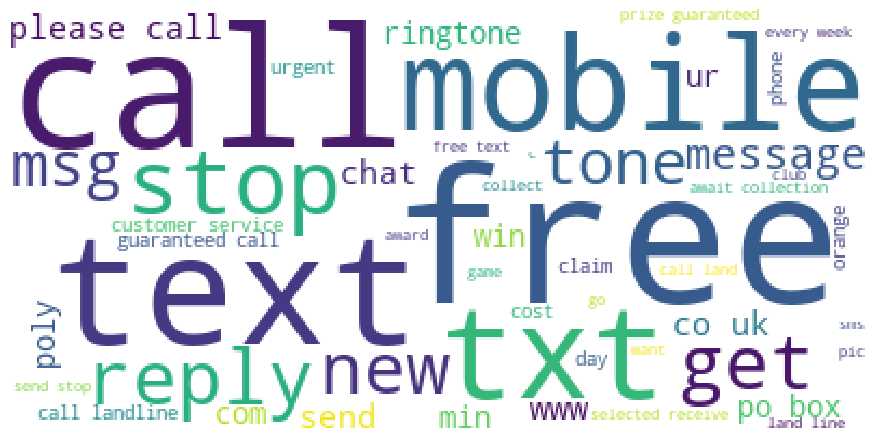

In [20]:
data_cl_spam = data_clean[data_clean['target'] == 'spam']
spam_txt = ''.join(data_cl_spam.text)

wc_spam = WordCloud(stopwords= stop, background_color= 'white', max_words= 50).generate(spam_txt)

plt.figure(figsize = (12, 6), facecolor = None) 
plt.imshow(wc_spam)

plt.axis("off") 
plt.tight_layout(pad = 0)
plt.show()

- À partir de la matrice de termes réduite, entraînez un modèle de forêts aléatoires permettant de prédire si un texto est un spam ou non 

In [32]:
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(data_clean['text'],
                                                   data_clean['target'])

pipeline_randomRor = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf',  TfidfTransformer()),
    ('rf', RandomForestClassifier()),
])

model = pipeline_randomRor.fit(X_train, y_train)

In [33]:
y_predict = model.predict(X_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         ham       0.97      1.00      0.99      1199
        spam       1.00      0.82      0.90       194

    accuracy                           0.97      1393
   macro avg       0.99      0.91      0.94      1393
weighted avg       0.98      0.97      0.97      1393



In [34]:
# We can try in this loop few models to check the most efficient
import datetime
import time
from time import strftime
from time import gmtime

models = {'KNN' : KNeighborsClassifier(n_neighbors = 10),
          'RandomForest' : RandomForestClassifier(),
          'DecisionTree' : DecisionTreeClassifier(),
          'SGDClassifier' : SGDClassifier()
         }

model_list = []
model_list = []
runtime_list = []
scor_list = []
csv_list = []

for k, v in models.items() :
    
    t0 = time.time() 
    
    model = v
    
    pipeline = Pipeline([
        ('vect', CountVectorizer()),
        ('tfidf',  TfidfTransformer()),
        ('model', model),
        ])


    model = pipeline.fit(X_train, y_train)
    runtime = time.time() - t0

    model_list.append(k)
    runtime_list.append(strftime("%H:%M:%S", gmtime(runtime)))

    # Score
    scor = model.score(X_train, y_train)
    scor_list.append(round(scor, 4))

    y_predict = model.predict(X_test)
    
    print("--------------------------")    
    print(k)
    print(classification_report(y_test, y_predict))
    print(f"Le modèle {k} est terminé")
    print("--------------------------")

--------------------------
KNN
              precision    recall  f1-score   support

         ham       0.88      1.00      0.94      1199
        spam       1.00      0.20      0.33       194

    accuracy                           0.89      1393
   macro avg       0.94      0.60      0.63      1393
weighted avg       0.90      0.89      0.85      1393

Le modèle KNN est terminé
--------------------------
--------------------------
RandomForest
              precision    recall  f1-score   support

         ham       0.97      1.00      0.99      1199
        spam       1.00      0.81      0.90       194

    accuracy                           0.97      1393
   macro avg       0.99      0.91      0.94      1393
weighted avg       0.97      0.97      0.97      1393

Le modèle RandomForest est terminé
--------------------------
--------------------------
DecisionTree
              precision    recall  f1-score   support

         ham       0.97      0.99      0.98      1199
        spa

In [35]:
from time import gmtime

# We display results in a new table
result = pd.DataFrame({'Model ' : model_list,
                       'Accuracy Score' : scor_list})
result

,Model,Accuracy Score
0,KNN,0.9017
1,RandomForest,0.9998
2,DecisionTree,0.9998
3,SGDClassifier,0.9993


- Essayez d'améliorer la prédiction de votre modèle en ajoutant une analyse en composantes principales en amont.

In [36]:
from sklearn.decomposition import PCA

# On a besoin de récupérer le df du début sans le groupby
cr_dtm2 = pd.DataFrame(cr_cv.toarray(), columns = cv.get_feature_names())
cr_dtm2.index = data_clean.target

X_train2, X_test2, y_train2, y_test2 = train_test_split(cr_dtm2,
                                                   sms.target)
pca = PCA(0.95).fit(X_train2)
X_train_pca = pca.transform(X_train2)
X_test_pca = pca.transform(X_test2)

In [37]:
pca.n_components_

1337

In [38]:
# We compare same models as below with PCA application
models = {'KNN' : KNeighborsClassifier(n_neighbors = 10),
          'RandomForest' : RandomForestClassifier(),
          'DecisionTree' : DecisionTreeClassifier(),
          'SGDClassifier' : SGDClassifier()
         }

model_list = []
model_list = []
runtime_list = []
scor_list = []
csv_list = []

for k, v in models.items() :
    
    t0 = time.time() 
    
    model = v

    model = model.fit(X_train_pca, y_train2)
    runtime = time.time() - t0

    model_list.append(k)
    runtime_list.append(strftime("%H:%M:%S", gmtime(runtime)))

    # Score
    scor = model.score(X_train_pca, y_train)
    scor_list.append(round(scor, 4))

    y_predict = model.predict(X_test_pca)
    
    print("--------------------------")    
    print(k)
    print(classification_report(y_test2, y_predict))
    print(f"Le modèle {k} est terminé")
    print("--------------------------")

--------------------------
KNN
              precision    recall  f1-score   support

         ham       0.90      1.00      0.95      1219
        spam       1.00      0.22      0.37       174

    accuracy                           0.90      1393
   macro avg       0.95      0.61      0.66      1393
weighted avg       0.91      0.90      0.87      1393

Le modèle KNN est terminé
--------------------------
--------------------------
RandomForest
              precision    recall  f1-score   support

         ham       0.95      1.00      0.98      1219
        spam       0.99      0.66      0.79       174

    accuracy                           0.96      1393
   macro avg       0.97      0.83      0.88      1393
weighted avg       0.96      0.96      0.95      1393

Le modèle RandomForest est terminé
--------------------------
--------------------------
DecisionTree
              precision    recall  f1-score   support

         ham       0.98      0.97      0.97      1219
        spa

In [39]:
result = pd.DataFrame({'Model ' : model_list,
                       'Run time' : runtime_list,
                       'Accuracy Score' : scor_list})
result

,Model,Run time,Accuracy Score
0,KNN,00:00:01,0.8413
1,RandomForest,00:00:21,0.7662
2,DecisionTree,00:00:09,0.7662
3,SGDClassifier,00:00:00,0.7667


On peut imaginer que pour une entreprise qui développe cette solution, on souhaite plus à minimiser l'erreur consistant à définir comme spam un texto qui n'en est pas un (erreur de type 1, "faux positif") plutôt que de rater quelques spams : 
- Utilisez votre dernier modèle pour prédire des probabilités que le texto soit un spam. À partir de quelle valeur de cette probabilité notre modèle ne classe aucun non spam en spam?

In [40]:
pipeline_randomRor2 = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf',  TfidfTransformer()),
    ('rf', RandomForestClassifier()),
])

model2 = pipeline_randomRor2.fit(X_train, y_train)

In [41]:
y_predict2 = model2.predict(X_test)

In [44]:
# We display a prediction table to compare result and prediction
submission_df_1 = pd.DataFrame({
    "target": y_predict,
    "result": y_test})
submission_df_1.head()

,target,result
191,ham,spam
2940,ham,ham
5446,ham,ham
5544,ham,ham
1459,ham,ham


In [45]:
# To monitor our model, we display a confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict2)

cm = pd.DataFrame(cm, columns = ['Prédit ' + str(_) for _ in model.classes_])
cm.index = ['vrai ' + str(_) for _ in model.classes_]
cm

,Prédit ham,Prédit spam
vrai ham,1199,0
vrai spam,36,158


Comme demandé plus haut, l'entreprise ne souhaite pas que de vrais SMS soient classés en tant que spam.  
Notre modèle prédit 0 bon mail en spam. L'objectif est donc atteint.  
Cependant, il reste de vrai spam classés en mails autorisés. Mais le ratio est faible.